In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta

%matplotlib widget
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

dfs = []
directory_path = "data/qqq-options-data-2020-2022"
# directory_path = "data/spy-options-data-2020-2022"

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)
        dfs.append(pd.read_csv(data_path, low_memory=False))

df_raw = pd.concat(dfs)
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

data/qqq-options-data-2020-2022/qqq_2020_2022.csv


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_SIZE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,-0.00005,0.02035,,,0.000000,1 x 1,163.160000,163.380000,160.0,0.000000,0.010000,0 x 591,0.020000,-0.00003,-0.00001,0.00018,-0.00424,0.00000,1.848130,1.000000,163.6,0.506
1,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02165,,,0.000000,1 x 1,158.170000,158.370000,165.0,0.000000,0.010000,0 x 1403,0.020000,-0.00046,0.00000,-0.00007,-0.00403,0.00000,1.771580,50.000000,158.6,0.490
2,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02161,,,0.000000,1 x 1,153.150000,153.370000,170.0,0.000000,0.010000,0 x 1403,0.010000,0.00000,0.00000,0.00049,-0.00410,-0.00015,1.695880,20.000000,153.6,0.475
3,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02235,,,0.000000,10 x 1,147.870000,148.750000,175.0,0.000000,0.010000,0 x 1403,0.020000,-0.00075,0.00004,0.00031,-0.00436,-0.00005,1.623820,150.000000,148.6,0.459
4,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02367,,,0.000000,10 x 10,142.890000,143.730000,180.0,0.000000,0.010000,0 x 1403,0.030000,-0.00081,0.00006,0.00075,-0.00381,-0.00013,1.552390,30.000000,143.6,0.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775744,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.10496,0.00182,1.04524,-0.01106,0.80900,0.175780,5.000000,4.260000,1 x 1,4.300000,4.860000,550.0,171.540000,175.990000,1 x 1,183.000000,-0.84889,0.00101,1.19605,-0.01285,-5.36083,0.183250,0.000000,170.1,0.448
1775745,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.09995,0.00170,1.01166,-0.01028,0.77417,0.177010,,0.000000,1 x 75,2.950000,5.760000,555.0,176.350000,181.000000,9 x 2,185.260000,-0.84829,0.00099,1.19256,-0.01287,-5.31736,0.186050,1.000000,175.1,0.461
1775746,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.09449,0.00166,0.97041,-0.01052,0.73176,0.177250,,0.000000,31 x 82,2.690000,5.450000,560.0,181.060000,185.500000,9 x 2,0.000000,-0.85014,0.00085,1.16875,-0.01325,-5.16910,0.186980,,180.1,0.474
1775747,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.08939,0.00160,0.92555,-0.00944,0.68769,0.177000,,0.000000,32 x 79,2.460000,5.080000,565.0,185.870000,190.500000,9 x 3,0.000000,-0.84911,0.00078,1.16659,-0.01272,-5.12856,0.190490,,185.1,0.487


In [2]:
# df_raw.info()

In [3]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
# df_final.info()

In [4]:
# df_final.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [5]:
# pd.DataFrame(df_final.DTE.value_counts()).head(20)
# df_final

Text(0.5, 1.0, 'Stock Price')

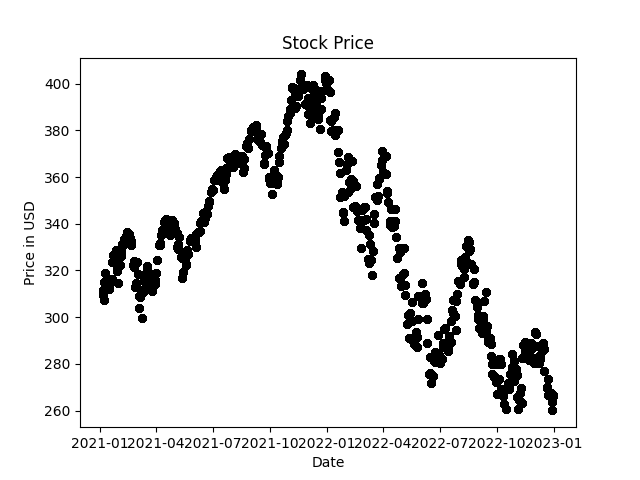

In [6]:
plt.scatter(
    pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
)
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.title("Stock Price")

In [7]:
df_option_history = df_final.copy()

df_option_history["EXPIRE_UNIX"] = pd.to_datetime(df_option_history.EXPIRE_UNIX, unit="s", utc=True)
df_option_history["QUOTE_UNIXTIME"] = pd.to_datetime(df_option_history.QUOTE_UNIXTIME, unit="s", utc=True).apply(
    lambda x: pd.Timestamp(x).round(freq="D")
)

df_option_history.set_index(pd.DatetimeIndex(df_option_history.QUOTE_UNIXTIME), inplace=True)
df_option_history.drop(columns=["QUOTE_UNIXTIME"], inplace=True)
df_option_history.sort_index(inplace=True)

df_option_history["OPTION_ID"] = df_option_history["EXPIRE_UNIX"].astype(str) + df_option_history["STRIKE"].astype(str)
df_option_history["OPTION_ID"] = df_option_history["OPTION_ID"].apply(lambda x: hash(x))


def get_df_cnn_fear_greed_index():
    print("Retrieving historical ETF fear and greed index")
    import json

    with open("cnn_fear_greed_index_data.json") as f:
        cnn_fear_greed_index_data = json.load(f)

    df_fear_greed_index = pd.DataFrame(
        data=cnn_fear_greed_index_data["data"]["c:50108"]["series"][0], columns=["x", "y"]
    )
    df_fear_greed_index.set_index(
        pd.DatetimeIndex([pd.Timestamp(x, unit="s", tz="UTC") for x in df_fear_greed_index.x]),
        inplace=True,
    )
    df_fear_greed_index.rename(columns={"y": "fear_greed_index"}, inplace=True)
    df_fear_greed_index["fear_greed_index"] = df_fear_greed_index.fear_greed_index.astype(float).astype(int)
    return df_fear_greed_index


df_fear_greed_index = get_df_cnn_fear_greed_index()
df_option_history = df_option_history.join(df_fear_greed_index, how="inner")

df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST", "fear_greed_index"]]
# df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST"]]
df_history.rename(columns={"UNDERLYING_LAST": "close"}, inplace=True)

CustomStrategy = ta.Strategy(
    name="RSI",
    ta=[
        {"kind": "rsi", "length": 14},
    ],
)
df_history.ta.strategy(CustomStrategy)

for column in ["close", "fear_greed_index", "RSI_14"]:
    for days in [14]:
        periods = days
        df_history[f"{column}_min_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).min()
        df_history[f"{column}_max_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).max()

# df_option_history = df_option_history.join(df_history, how="inner")
df_option_history = df_option_history.join(df_history.drop(columns=["fear_greed_index"]), how="inner")
df_option_history["index"] = df_option_history.index
df_option_history.sort_values(by=["index", "EXPIRE_UNIX", "DTE", "STRIKE_DISTANCE_PCT"], inplace=True)

df_option_history

Retrieving historical ETF fear and greed index


,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,x,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14,index
2021-05-18 00:00:00+00:00,16.0,324.44,2021-05-17 20:00:00+00:00,0.0,1.00000,0.00000,0.00000,-0.00035,0.00694,NaN,NaN,0.35,0.34,0.44,324.0,0.03,0.07,0.04,-0.18585,0.54261,0.03924,-0.05014,-0.00094,0.03353,NaN,0.4,0.001,-8950715779041343600,2021-05-18,34,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,324.44,2021-05-17 20:00:00+00:00,0.0,0.09826,0.40027,0.02551,-0.02006,0.00069,0.03015,NaN,0.02,0.01,0.04,325.0,0.61,0.76,0.79,-0.74789,0.38048,0.04665,-0.12534,-0.00433,0.05740,NaN,0.6,0.002,-4112504173128842101,2021-05-18,34,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,324.44,2021-05-17 20:00:00+00:00,0.0,0.03029,0.08312,0.01023,-0.01026,-0.00003,0.05774,NaN,0.03,0.02,0.02,326.0,1.56,1.71,1.84,-0.87522,0.14638,0.02973,-0.08046,-0.00473,0.09216,481.0,1.6,0.005,3857976610164571845,2021-05-18,34,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,324.44,2021-05-17 20:00:00+00:00,0.0,1.00000,0.00000,0.00000,-0.00017,0.00682,NaN,NaN,2.38,2.26,2.42,322.0,0.02,0.03,0.01,-0.02943,0.05143,0.00999,-0.01417,-0.00016,0.08914,NaN,2.4,0.008,8023005314953772801,2021-05-18,34,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,324.44,2021-05-17 20:00:00+00:00,0.0,0.00953,0.01719,0.00381,-0.00535,-0.00039,0.10426,NaN,0.01,0.00,0.01,328.0,3.54,3.70,4.03,-0.92770,0.04573,0.02007,-0.06009,-0.00385,0.16061,130.0,3.6,0.011,4159750605645114236,2021-05-18,34,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:00:00+00:00,16.0,266.35,2025-01-17 21:00:00+00:00,749.0,0.11563,0.00228,0.74478,-0.01330,0.55186,0.21844,0.0,3.66,3.45,4.93,435.0,166.50,171.50,0.00,-0.89067,0.00401,0.47511,-0.00548,-0.99441,0.33072,NaN,168.6,0.633,-1910732919837083365,2022-12-31,38,266.35,40.875729,260.05,288.72,35.0,60.0,32.894561,54.926318,2022-12-31 00:00:00+00:00
2022-12-31 00:00:00+00:00,16.0,266.35,2025-01-17 21:00:00+00:00,749.0,0.10564,0.00224,0.69655,-0.01252,0.50450,0.21601,0.0,6.40,1.81,5.60,440.0,171.50,175.34,173.48,-1.00000,0.00000,0.00000,0.00000,0.00000,NaN,0.0,173.6,0.652,1355945608527222379,2022-12-31,38,266.35,40.875729,260.05,288.72,35.0,60.0,32.894561,54.926318,2022-12-31 00:00:00+00:00
2022-12-31 00:00:00+00:00,16.0,266.35,2025-01-17 21:00:00+00:00,749.0,0.11432,0.00224,0.73776,-0.01369,0.54044,0.22846,0.0,3.54,3.04,5.50,445.0,176.50,180.30,0.00,-1.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,178.6,0.671,628746725162281017,2022-12-31,38,266.35,40.875729,260.05,288.72,35.0,60.0,32.894561,54.926318,2022-12-31 00:00:00+00:00
2022-12-31 00:00:00+00:00,16.0,266.35,2025-01-17 21:00:00+00:00,749.0,0.09064,0.00198,0.62140,-0.01032,0.43333,0.21345,10.0,2.95,2.88,3.20,450.0,181.50,186.50,189.60,-0.87929,0.00373,0.50582,-0.00604,-1.08469,0.35258,0.0,183.6,0.690,4711351571514005665,2022-12-31,38,266.35,40.875729,260.05,288.72,35.0,60.0,32.894561,54.926318,2022-12-31 00:00:00+00:00


In [8]:
df_option_history.describe().astype(str)

,QUOTE_TIME_HOURS,UNDERLYING_LAST,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14
count,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1187860.0,950776.0,1250276.0,1250276.0,1250276.0,1251283.0,1250276.0,1250276.0,1250276.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1150101.0,944477.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1194011.0,1198018.0,1198018.0,1198018.0,1198018.0,1145149.0,1145149.0
mean,16.0,333.55761660631515,125.86021589041007,0.4959345593522809,-0.34020476722691817,0.3156369178595091,-0.0651492842386574,0.5150492495782323,0.3479537798141195,95.16620528915328,22.025847540862983,35.46822633562509,35.94820853955445,335.394381207129,36.62841910106249,37.12461125383518,18.45857575447342,-0.4951933487788134,-1.7614258993049545,-4.2656659218578055,-0.09569638354393052,-0.4380058879805769,0.36052529395244404,123.28936014323271,63.34454260147385,0.19334390941138016,7.889697194011595e+16,38.45892495942165,333.55761660631515,51.56705355341724,321.2833551833109,347.29735391287943,24.92863796704223,51.88648918463662,40.790344299784586,60.77471380968232
std,0.0,40.365464541896856,178.96205079368295,0.38406436499821434,387.25796688320344,6.580791531619123,0.07896054823677628,7.291470729122004,0.3527173491898114,943.7832168315631,40.855607463299,50.02395993518454,50.450545263831295,85.8339441999192,53.87834055470307,54.3480892476342,36.60986432108487,0.3824286456278921,1977.3063876233678,56.51013861671685,0.7039459922511044,1.0349541597262477,0.2972557292244118,1186.4283933236247,60.109372874595415,0.18896011461979392,5.336823437447764e+18,16.64464552798994,40.365464541896856,13.379734326824552,39.84070952761892,38.433259394742585,14.00858852815614,14.403622509639623,11.014307186494252,11.123080980162415
min,16.0,260.05,0.0,0.0,-433189.70517,-1817.09995,-2.38038,-1777.13289,-0.0005,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,-1.0,-2211829.9611,-2156.70026,-43.52167,-34.59908,-0.0005,0.0,0.0,0.0,-9.222630187339538e+18,4.0,260.05,23.209336423458275,260.05,282.17,4.0,22.0,23.209336423458275,42.18860128411447
25%,16.0,293.57,15.0,0.05988,0.0006,0.02783,-0.0897,0.00905,0.22615,0.0,0.01,0.64,0.74,282.0,1.89,1.97,0.01,-0.90359,0.00055,0.03901,-0.09074,-0.40120500000000003,0.23403,0.0,19.6,0.059,-4.5162423565897943e+18,26.0,293.57,40.87572930901406,285.67,310.71,16.0,41.0,32.03269029113405,52.28447676517976
50%,16.0,338.1,36.0,0.53302,0.00319,0.17911,-0.0437,0.09073,0.27744,1.0,2.45,13.98,14.36,335.0,14.49,14.83,2.99,-0.4718,0.00315,0.20066,-0.04318,-0.0869,0.29927,1.0,43.2,0.13,3.3399488407506464e+16,37.0,338.1,48.79869719180023,323.35,356.03,20.0,52.0,37.54478207396292,59.98020618167449
75%,16.0,366.59,176.96,0.89195,0.00772,0.4674,-0.01171,0.41932,0.35468,10.0,24.71,49.44,50.14,385.0,47.06,47.77,19.66,-0.09158,0.00756,0.49983,-0.01522,-0.00573,0.39863,17.0,89.2,0.27,4.71749524563634e+18,52.0,366.59,62.18229664252697,354.7,378.34,32.0,64.0,48.2575025993181,69.36879030606221
max,16.0,403.41,942.04,1.0,2.26443,46.35949,0.0,263.72682,20.61525,98920.0,308.13,311.08,312.77,610.0,349.83,350.82,348.32,0.0,280.89887,64.76674,0.0,0.0,10.02792,251871.0,349.9,1.346,9.223076044308241e+18,77.0,403.41,84.79897235588429,389.52,403.41,62.0,77.0,72.74370131501239,84.79897235588429


In [9]:
min_dte_buy = 14
min_dte_sell = int(min_dte_buy / 2)
min_volume = 100
max_strike_distance_pct = 0.05
contract_fee = 0.66

money = 2000
start_money = money
last_index = df_option_history.index.values[-1]

owned_options = []
trade_data = []

for index, row in df_option_history.iterrows():
    expire_date = row.EXPIRE_UNIX.strftime(format="%Y-%m-%d")
    index_date = index.strftime(format="%Y-%m-%d")
    is_last_index = index.to_numpy() == last_index

    good_call_buy = row.fear_greed_index >= row.fear_greed_index_max_14 - 1
    good_put_buy = row.fear_greed_index <= row.fear_greed_index_min_14 + 1

    call_bid_price = row.C_BID * 100
    put_bid_price = row.P_BID * 100

    owned_options_not_sold = []

    for option in owned_options:
        if option["OPTION_ID"] == row.OPTION_ID:
            if (
                option["side"] == "call"
                and not np.isnan(row.C_BID)
                and (
                    not good_call_buy
                    or row.DTE < min_dte_sell
                    or (option["DTE"] - row.DTE) > min_dte_sell
                    or is_last_index
                )
            ):
                money += call_bid_price - contract_fee
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_bid_price:.0f} {row.OPTION_ID}"
                )
                trade_data.append(
                    {
                        "date": index_date,
                        "money": money,
                        "side": "sell",
                        "price": call_bid_price,
                        "options": len(owned_options) - 1,
                    }
                )
            elif (
                option["side"] == "put"
                and not np.isnan(row.P_BID)
                and (
                    not good_put_buy
                    or row.DTE < min_dte_sell
                    or (option["DTE"] - row.DTE) > min_dte_sell
                    or is_last_index
                )
            ):
                money += put_bid_price - contract_fee
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_bid_price:.0f} {row.OPTION_ID}"
                )
                trade_data.append(
                    {
                        "date": index_date,
                        "money": money,
                        "side": "sell",
                        "price": put_bid_price,
                        "options": len(owned_options) - 1,
                    }
                )
            else:
                owned_options_not_sold.append(option)
        else:
            owned_options_not_sold.append(option)

    owned_options = owned_options_not_sold

    max_buy_price = money / 10
    call_ask_price = row.C_ASK * 100
    put_ask_price = row.P_ASK * 100

    if not is_last_index and row.DTE > min_dte_buy and row.STRIKE_DISTANCE_PCT < max_strike_distance_pct:
        if (
            good_call_buy
            and not np.isnan(row.C_ASK)
            and row.C_VOLUME > min_volume
            and call_ask_price <= max_buy_price
            and money >= call_ask_price
            and len([x for x in owned_options if x["OPTION_ID"] == row.OPTION_ID]) == 0
            # and len([x for x in owned_options if x["side"] == "call" and x["purchase_date"] == index_date]) <= 25
        ):
            money -= call_ask_price + contract_fee
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "call"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_ask_price:.0f} {row.OPTION_ID}"
            )
            trade_data.append(
                {
                    "date": index_date,
                    "money": money,
                    "side": "buy",
                    "price": call_ask_price,
                    "options": len(owned_options),
                }
            )
        elif (
            good_put_buy
            and not np.isnan(row.P_ASK)
            and row.P_VOLUME > min_volume
            and put_ask_price <= max_buy_price
            and money >= put_ask_price
            and len([x for x in owned_options if x["OPTION_ID"] == row.OPTION_ID]) == 0
            # and len([x for x in owned_options if x["side"] == "put" and x["purchase_date"] == index_date]) <= 25
        ):
            money -= put_ask_price + contract_fee
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "put"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_ask_price:.0f} {row.OPTION_ID}"
            )
            trade_data.append(
                {
                    "date": index_date,
                    "money": money,
                    "side": "buy",
                    "price": put_ask_price,
                    "options": len(owned_options),
                }
            )

print(f"Start money: ${start_money:.2f}")
print(f"End money: ${money:.2f} ({(money-start_money)/start_money*100:.2f}%)")

2021-06-10 $1895 1 buy call 2021-06-25 336.86 347.5 $104 -4469340256705121687
2021-06-10 $1798 2 buy call 2021-06-25 336.86 348.0 $97 -8448664628459622909
2021-06-10 $1660 3 buy call 2021-06-30 336.86 348.0 $137 -3686036280222082352
2021-06-11 $1573 4 buy call 2021-06-25 340.37 350.0 $86 6730904229074042166
2021-06-11 $1483 5 buy call 2021-06-30 340.37 352.0 $90 1348409157919533623
2021-06-15 $1405 6 buy call 2021-06-30 344.5 355.0 $77 -5503709043225631943
2021-06-15 $1332 7 buy call 2021-07-02 344.5 357.0 $72 -4007688524280272786
2021-06-15 $1206 8 buy call 2021-07-16 344.5 359.0 $126 -864363865887652043
2021-06-15 $1094 9 buy call 2021-07-16 344.5 360.0 $111 5640714495869022133
2021-06-16 $1246 8 sell call 2021-06-25 342.15 347.5 $153 -4469340256705121687
2021-06-16 $1387 7 sell call 2021-06-25 342.15 348.0 $141 -8448664628459622909
2021-06-16 $1486 6 sell call 2021-06-25 342.15 350.0 $100 6730904229074042166
2021-06-16 $1675 5 sell call 2021-06-30 342.15 348.0 $190 -3686036280222082

In [10]:
# Options: 5726
# End money: $555381.84 (27669.09%)

# Options: 5880
# End money: $688471.20 (34323.56%)

# Options: 7218
# End money: $827312.12 (41265.61%)

# Options: 22880
# End money: $2652960.20 (132548.01%)

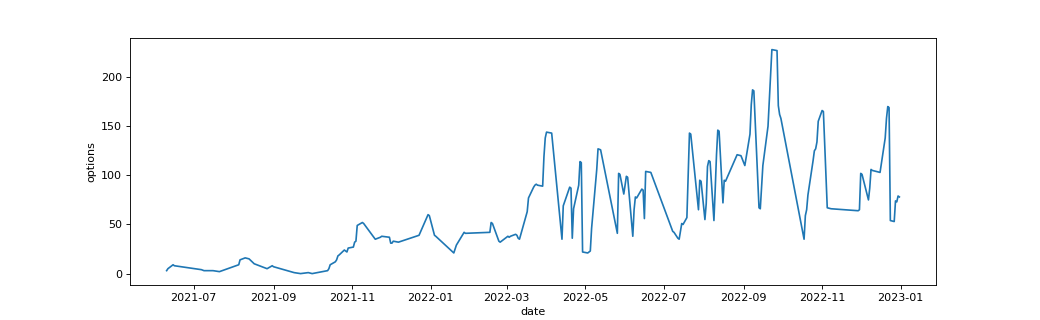

,money,price,options
count,8086.0,8086.0,8086.0
mean,403991.3948726382,1184.3527083848628,60.49950531783329
std,255596.48911699216,789.9694784484459,47.54169669800739
min,637.9400000000019,2.0,0.0
25%,151366.89999999758,611.0,23.0
50%,420121.9900000351,1014.0,50.0
75%,610344.2800000488,1583.0,87.0
max,864466.519999989,6100.0,228.0


In [11]:
from matplotlib.pyplot import figure

figure(figsize=(13, 4), dpi=80)

df_trades = pd.DataFrame(trade_data)
# field_to_plot = "money"
# df_trades_plot = df_trades.loc[(df_trades["side"] == "sell") & (df_trades["options"] == 0)]
field_to_plot = "options"
df_trades_plot = df_trades.groupby(["date"]).max("options").reset_index()
plt.clf()
plt.plot(pd.to_datetime(df_trades_plot["date"]), df_trades_plot[field_to_plot])
plt.xlabel("date")
plt.ylabel(field_to_plot)
plt.show()
df_trades.describe().astype(str)